This notebook plots LBG x CMB Lensing and the predicted SNR as a function of LBG number density

In [1]:
import matplotlib.pyplot as plt
from lbg_survey_metrics.cmb_xcorr import *
from lbg_survey_metrics.constants import *
from lbg_survey_metrics.galaxy_distribution import *
from lbg_survey_metrics.utils import cache_cmb_snr

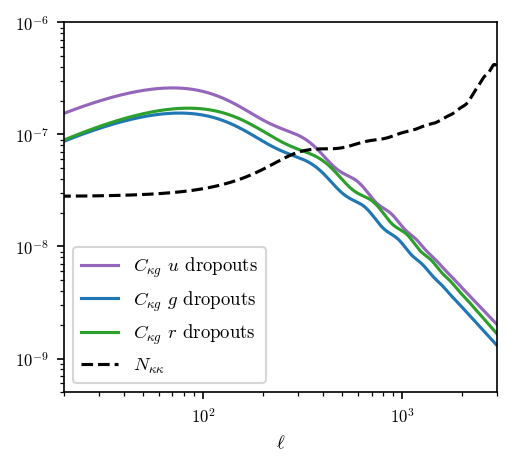

In [2]:
# Plot all cross-spectra with lensing noise
fig, ax = plt.subplots(figsize=single_col, constrained_layout=True, dpi=150)

for band in "ugr":
    ell, Cgg, Ckg, Ckk = calc_cross_spectra(25, band)
    ax.plot(ell, Ckg, label="$C_{\kappa g}$ " + f"${band}$ dropouts", c=colors[band])

ax.plot(ell, Nkk, c="k", ls="--", label="$N_{\kappa \kappa}$")

ax.legend()
ax.set(
    xscale="log",
    yscale="log",
    xlim=(20, 3_000),
    ylim=(5e-10, 1e-6),
    xlabel="$\ell$",
)

fig.savefig("figures/cmb_xcorr.pdf")

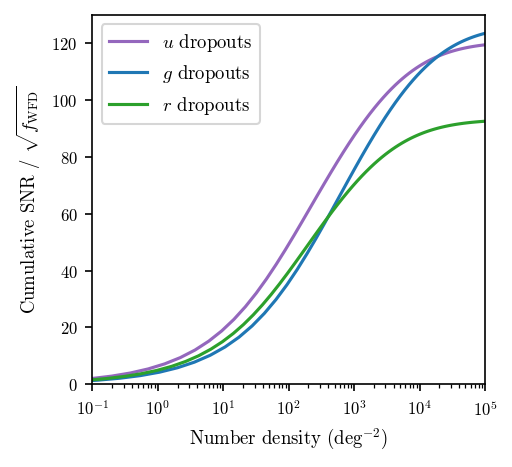

In [3]:
# Plot SNR vs number density
fig, ax = plt.subplots(figsize=single_col, constrained_layout=True, dpi=150)

for band in "ugr":
    ax.plot(cache_cmb_snr["n"][band], cache_cmb_snr["snr"][band], c=colors[band], label=f"${band}$ dropouts")

ax.legend()
ax.set(
    xlabel="Number density (deg$^{-2}$)",
    ylabel="Cumulative SNR / $\sqrt{f_\mathrm{WFD}}$",
    xscale="log",
    xlim=(1e-1, 1e5),
    ylim=(0, 130),
)

fig.savefig("figures/cmb_xcorr_snr.pdf")